In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading data set and understanding the data

In [74]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()
# print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Checking data types and null values in data. 

As there is no null value in the data. The data types are also fine

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Checking duplicates in data.

No duplicate value in data

In [76]:
df.duplicated().sum()

0

## how many customers exited and how many not. 

In [77]:
(df['Exited'] == 1).sum() # how i checked.

2037

In [78]:
df["Exited"].value_counts ()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [79]:
df["Geography"].value_counts ()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [80]:
df["Gender"].value_counts ()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## Dropping three columns that are not needed. 

Row Number, Costumer ID and the Surname

In [81]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [82]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Not performing EDA. End goal is to practice ANN so not performing EDA. 

## Getting dummies, or Onehot encoding.


In [83]:
df = pd.get_dummies(df,columns=["Geography", "Gender"], drop_first = True)


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


## Splitting the data

In [85]:
X = df.drop(columns=["Exited"])
y = df["Exited"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

## Scalling the data

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [87]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

## Imprting libraries

In [88]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

## Creating a neural network

In [89]:
model = keras.Sequential()
model.add(Dense(3, activation = "sigmoid", input_dim = 11)) # input layer
# 3 = nummber of nodes. 
model.add(Dense(1, activation="sigmoid"))

## summery of model

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Whats it saying. 

In layer 1, Dense_2, there are 3 nodes and 33+3=36 parameters. 33 are the weights and 3 are the biases. 

## Compiling the model

In [91]:
model.compile(loss = "binary_crossentropy", optimizer= "Adam")

## Fitting the model

Model gets trained. Means weights and biases are calculated


In [92]:
model.fit(X_train_scaled, y_train ,epochs=10) # epoches = number of iterations to change the weights. 

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.6977
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5476
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4829
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4578
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4467
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4404
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4363
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4334
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4296


**Model calculated its values of weights and biases**

## Checking values of weights and biases

In [93]:
model.layers[0].get_weights()

[array([[-0.27010432, -0.14066339,  0.20038827],
        [ 1.5449544 , -1.0903108 , -1.1128298 ],
        [-0.14822029, -0.05627348,  0.1002408 ],
        [ 0.24908268, -0.04816412, -0.43981344],
        [-0.26172507,  0.31930748, -0.23509924],
        [-0.34649628, -0.1643158 , -0.07218187],
        [-0.55235547,  0.87584347,  0.7546764 ],
        [-0.23034514, -0.23939079, -0.06035678],
        [ 0.05080524, -0.7035814 , -0.8366483 ],
        [-0.19159348, -0.22597055,  0.04687715],
        [-0.2870984 ,  0.5684811 ,  0.34798786]], dtype=float32),
 array([-0.51225746,  0.75695825,  0.8829798 ], dtype=float32)]

**The 33 weights of first layer and 3 biases are the output.**

In [94]:
model.layers[1].get_weights()

[array([[ 0.9653702],
        [-1.2727   ],
        [-0.8893538]], dtype=float32),
 array([-0.5889663], dtype=float32)]

In [95]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 978us/step


In [96]:
y_pred =np.where(y_log>0.5,1,0) # jahan y_log ki value 0.5 hy tu 1 kr do, warna 0 zero kr do.

## Checking accuracy


In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.814

### The output isnt 0 and 1. Its a float number between 0 to 1. It is because we are using sigmoid function. and sigmoid tells the probabily between 0 to 1

**Now we will convert these probabilities in 0 and 1. For that purpose we have to decide or define a threshhod. 

## Changings in the model


In [98]:
model_2 = Sequential()
model_2.add(Dense(11,activation="relu", input_dim = 11)) # Increase the number of nodes. 
model_2.add(Dense(11, activation="relu")) # added one more layer
model_2.add(Dense(1, activation="sigmoid"))

In [99]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [101]:
# saving the model in a dictionary
history = model_2.fit(X_train_scaled, y_train, epochs=50, validation_split= 0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5258 - accuracy: 0.7802 - val_loss: 0.4784 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4586 - accuracy: 0.7972 - val_loss: 0.4543 - val_accuracy: 0.7975
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.7984 - val_loss: 0.4437 - val_accuracy: 0.7987
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8030 - val_loss: 0.4373 - val_accuracy: 0.8031
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8127 - val_loss: 0.4312 - val_accuracy: 0.8156
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8213 - val_loss: 0.4262 - val_accuracy: 0.8206
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8269 - val_loss: 0.4198 - val_accuracy: 0.8219
Epoch 

If training data accuracy is increasing and validation data accuracy doesn't increase then its a overfitting case.

In [102]:
history.history

{'loss': [0.5257864594459534,
  0.4585598111152649,
  0.44300591945648193,
  0.4349757730960846,
  0.4286962151527405,
  0.4227351248264313,
  0.4170784652233124,
  0.41210994124412537,
  0.40763840079307556,
  0.4031364321708679,
  0.39895835518836975,
  0.39360809326171875,
  0.3863808810710907,
  0.37722569704055786,
  0.36696597933769226,
  0.3584694564342499,
  0.3521624505519867,
  0.34762683510780334,
  0.34445804357528687,
  0.3428161144256592,
  0.3411470353603363,
  0.3399330973625183,
  0.33866259455680847,
  0.3381762206554413,
  0.3372045159339905,
  0.3368682563304901,
  0.3364764153957367,
  0.33597278594970703,
  0.33534225821495056,
  0.33488398790359497,
  0.3350696563720703,
  0.3345678746700287,
  0.33421391248703003,
  0.3338227868080139,
  0.33390000462532043,
  0.33334583044052124,
  0.3333560824394226,
  0.3329761028289795,
  0.33302170038223267,
  0.332394003868103,
  0.3320193886756897,
  0.3322778046131134,
  0.3318517804145813,
  0.3317202627658844,
  0.3311

From history we got 4 things, first trainig loss, 2nd training accuracy, 3rd validation loss, 4th validation accuracy

## Saved the whole process in a variable dictionary. Now we can plot any stage, any epoch.

## Plotting the model

In [103]:
import matplotlib.pyplot as plt

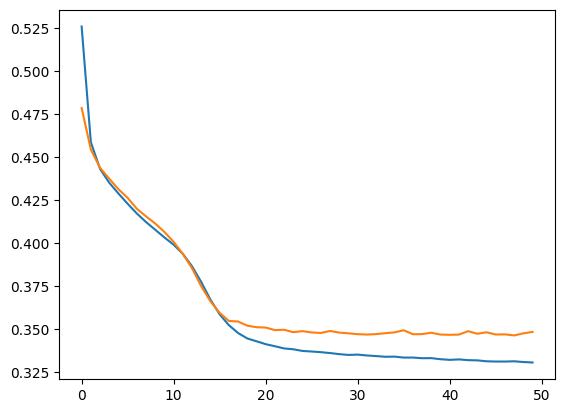

In [104]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

This is showing the overfitting of model 

### The plot is displaying the loss from epoch one to epoch 100

(0.83, 0.87)

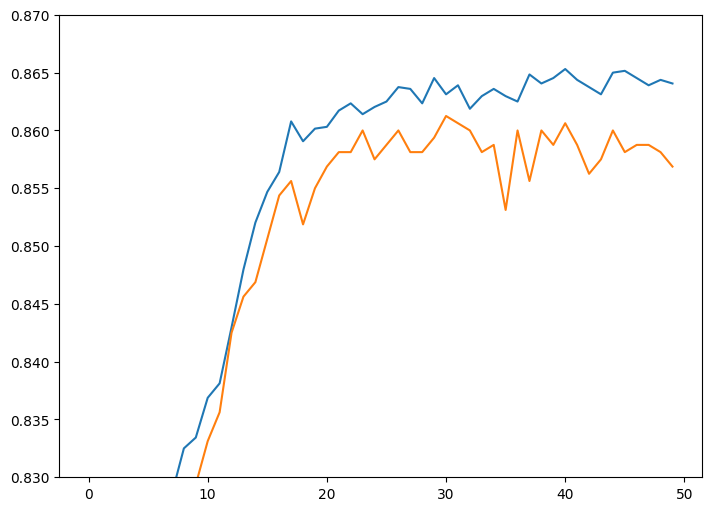

In [105]:
fig, ax = plt.subplots(figsize=(7,5), layout='constrained')
ax.plot(history.history["accuracy"], label="accuracy")
ax.plot(history.history["val_accuracy"], label="val_accuracy")
ax.set_ylim(0.83, 0.87)

In [106]:
model_2.layers[0].get_weights() # 121+11 prams. 

[array([[ 0.06796948, -0.04731689,  0.07296418, -0.02375761, -0.03399723,
          0.3142436 , -0.09323157,  0.00787748,  0.19429217, -0.1989913 ,
         -0.02781591],
        [-0.3075309 , -0.02616728, -0.43257284,  0.20307925,  1.162516  ,
          0.24303159,  0.58885914, -0.6243395 ,  0.96443284, -0.36846352,
         -0.35312638],
        [ 0.4948029 , -0.10958155,  0.14453523,  0.03982627, -0.02360142,
         -0.17287154,  0.18998721, -0.03614159,  0.11720654,  0.16817208,
         -0.36431506],
        [-0.4040868 , -0.13722156,  0.29064146,  0.2697719 , -0.23204412,
          0.16667828, -0.00481426, -0.4610085 ,  0.04027128, -0.29677948,
         -0.04052014],
        [ 0.1467478 , -0.08925635,  0.6087671 ,  0.9790822 , -0.50532454,
          0.24149862,  0.07312144,  0.2883742 ,  0.3370222 ,  0.71122473,
          0.0876025 ],
        [-0.58901864,  0.368687  ,  0.3527812 , -0.01590606, -0.03295565,
         -0.17929849,  0.35678887,  0.35241786, -0.23959123, -0.0217710

In [107]:
y1_log = model_2.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [108]:
y1_pred = np.where(y1_log>0.5, 1,0)

In [109]:
accuracy_score(y_test, y1_pred)

0.8635